In [1]:
import pandas as pd
import numpy as np
from scipy.stats import kstest,ttest_ind
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 7, 'ytick.major.width': 1.5, 'ytick.major.size': 7})
from matplotlib.backends.backend_pdf import PdfPages

In [5]:
oligo_table = "/data5/deepro/ukbiobank/papers/bmi_project/4_characterization/post_menopause/data/oligogenic/oligo_table.csv"
oligo_df = pd.read_csv(oligo_table)

# Violin plot

In [6]:
violin_df = oligo_df

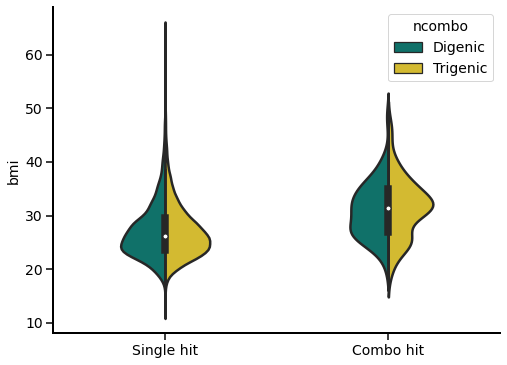

In [7]:
fig = plt.figure(figsize=(8,6))
sns_ax = sns.violinplot(
    data=violin_df, x="vtype", y="bmi", 
    hue="ncombo", split=True,
    width=0.4, linewidth=2.5,
    palette=["#008176", "#eecc16"],  # "#eecc16", "#c1272d"
    hue_order= ["Digenic", "Trigenic"],
    )

ax = plt.gca()
sns_ax.set_xlabel("")
ax.spines[['right', 'top']].set_visible(False)


In [8]:
single_hit_pheno_c2 = violin_df.loc[(violin_df.vtype=="Single hit")&(violin_df.ncombo=="Digenic")]
combo_hit_pheno_c2 = violin_df.loc[(violin_df.vtype=="Combo hit")&(violin_df.ncombo=="Digenic")]

single_hit_pheno_c3 = violin_df.loc[(violin_df.vtype=="Single hit")&(violin_df.ncombo=="Trigenic")]
combo_hit_pheno_c3 = violin_df.loc[(violin_df.vtype=="Combo hit")&(violin_df.ncombo=="Trigenic")]

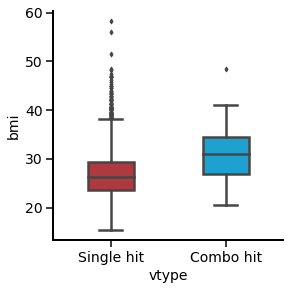

In [9]:
boxdf = pd.concat((single_hit_pheno_c2, combo_hit_pheno_c2), axis=0)

# Box Plot
sns_ax = sns.catplot(
    data=boxdf,
    palette=["#c1272d", "#00ADEE"],  # "#eecc16", "#008176" '#D1245D', '#00ADEE', '#D1245D', '#00ADEE' "#0000a7"
    kind="box",
    x="vtype",
    y="bmi",
    orient="v",
    height=4,
    aspect=1,
    width=0.4,
    linewidth=2.5,
    fliersize=3.5
    )

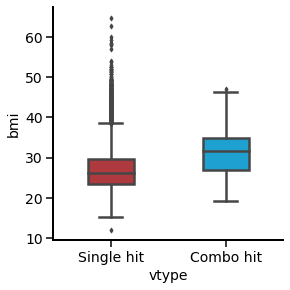

In [10]:
boxdf = pd.concat((single_hit_pheno_c3, combo_hit_pheno_c3), axis=0)
# # Define Canvas
# fig,ax = plt.subplots(1, 1, figsize=(8, 8))

# Box Plot
sns_ax = sns.catplot(
    data=boxdf,
    palette=["#c1272d", "#00ADEE"],  # "#eecc16", "#008176" '#D1245D', '#00ADEE', '#D1245D', '#00ADEE' "#0000a7"
    kind="box",
    x="vtype",
    y="bmi",
    orient="v",
    height=4,
    aspect=1,
    width=0.4,
    linewidth=2.5,
    fliersize=3.5
    )

In [11]:
ttest_ind(single_hit_pheno_c2.bmi, combo_hit_pheno_c2.bmi, alternative="less"), kstest(single_hit_pheno_c2.bmi, combo_hit_pheno_c2.bmi)

(Ttest_indResult(statistic=-5.87246281297751, pvalue=2.422003373966255e-09),
 KstestResult(statistic=0.349061908900363, pvalue=4.308473058323159e-07))

In [12]:
ttest_ind(single_hit_pheno_c3.bmi, combo_hit_pheno_c3.bmi, alternative="less"), kstest(single_hit_pheno_c3.bmi, combo_hit_pheno_c3.bmi)

(Ttest_indResult(statistic=-9.397522790671632, pvalue=3.028952747120067e-21),
 KstestResult(statistic=0.4779472690323658, pvalue=1.2835001677517422e-23))